<a href="https://colab.research.google.com/github/tigerjk726/Bumjoong/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')             

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/Colab Notebooks/2022.10.10 typhoon

/content/drive/My Drive/Colab Notebooks/2022.10.10 typhoon


In [3]:
import pandas as pd
df = pd.read_csv('summary.csv')
df

,DATE,AAO,AMO,AO,EMI,GMT,NINO3,NINO4,PDO,PNA,QBO,FREG,INTEN
0,198001,2468.847,-0.251,-13914.348,0.468,-0.008,0.362,0.318,0.688,-0.787,-1.147,0,0.0
1,198002,5287.235,-0.265,-7920.162,0.573,0.048,0.025,0.311,1.233,1.002,3.094,0,0.0
2,198003,18067.714,-0.343,-9798.327,0.417,0.005,-0.153,0.166,1.107,-0.539,5.553,0,0.0
3,198004,23780.651,-0.064,-4271.158,0.394,0.035,-0.189,0.107,1.255,1.457,11.231,0,0.0
4,198005,3995.642,0.046,-8602.326,0.369,0.072,-0.155,0.201,1.204,0.377,18.477,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,202008,8954.542,0.263,-1599.950,-0.229,0.320,-0.558,-0.237,-1.413,-0.156,20.514,2,67.5
488,202009,4960.132,0.135,4138.498,-0.207,0.435,-0.918,-0.463,-1.137,0.402,20.357,2,90.0
489,202010,-10689.321,0.129,662.580,-0.377,0.416,-1.043,-0.695,-0.612,-0.943,19.270,0,0.0
490,202011,-13940.175,0.026,16778.709,-0.441,0.519,-1.136,-0.792,-1.451,-0.402,18.811,0,0.0


In [4]:
df.columns

Index(['DATE', 'AAO', 'AMO', 'AO', 'EMI', 'GMT', 'NINO3', 'NINO4', 'PDO',
       'PNA', 'QBO', 'FREG', 'INTEN'],
      dtype='object')

In [5]:
X = df.drop(columns = ['DATE','FREG','INTEN']) # "X"라는 변수에 날짜, 횟수와 강도를 제외하고 지정
y = df['FREG']
y2 = df['INTEN']
X

,AAO,AMO,AO,EMI,GMT,NINO3,NINO4,PDO,PNA,QBO
0,2468.847,-0.251,-13914.348,0.468,-0.008,0.362,0.318,0.688,-0.787,-1.147
1,5287.235,-0.265,-7920.162,0.573,0.048,0.025,0.311,1.233,1.002,3.094
2,18067.714,-0.343,-9798.327,0.417,0.005,-0.153,0.166,1.107,-0.539,5.553
3,23780.651,-0.064,-4271.158,0.394,0.035,-0.189,0.107,1.255,1.457,11.231
4,3995.642,0.046,-8602.326,0.369,0.072,-0.155,0.201,1.204,0.377,18.477
...,...,...,...,...,...,...,...,...,...,...
487,8954.542,0.263,-1599.950,-0.229,0.320,-0.558,-0.237,-1.413,-0.156,20.514
488,4960.132,0.135,4138.498,-0.207,0.435,-0.918,-0.463,-1.137,0.402,20.357
489,-10689.321,0.129,662.580,-0.377,0.416,-1.043,-0.695,-0.612,-0.943,19.270
490,-13940.175,0.026,16778.709,-0.441,0.519,-1.136,-0.792,-1.451,-0.402,18.811


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6711b259d0>,
      dtype=object)

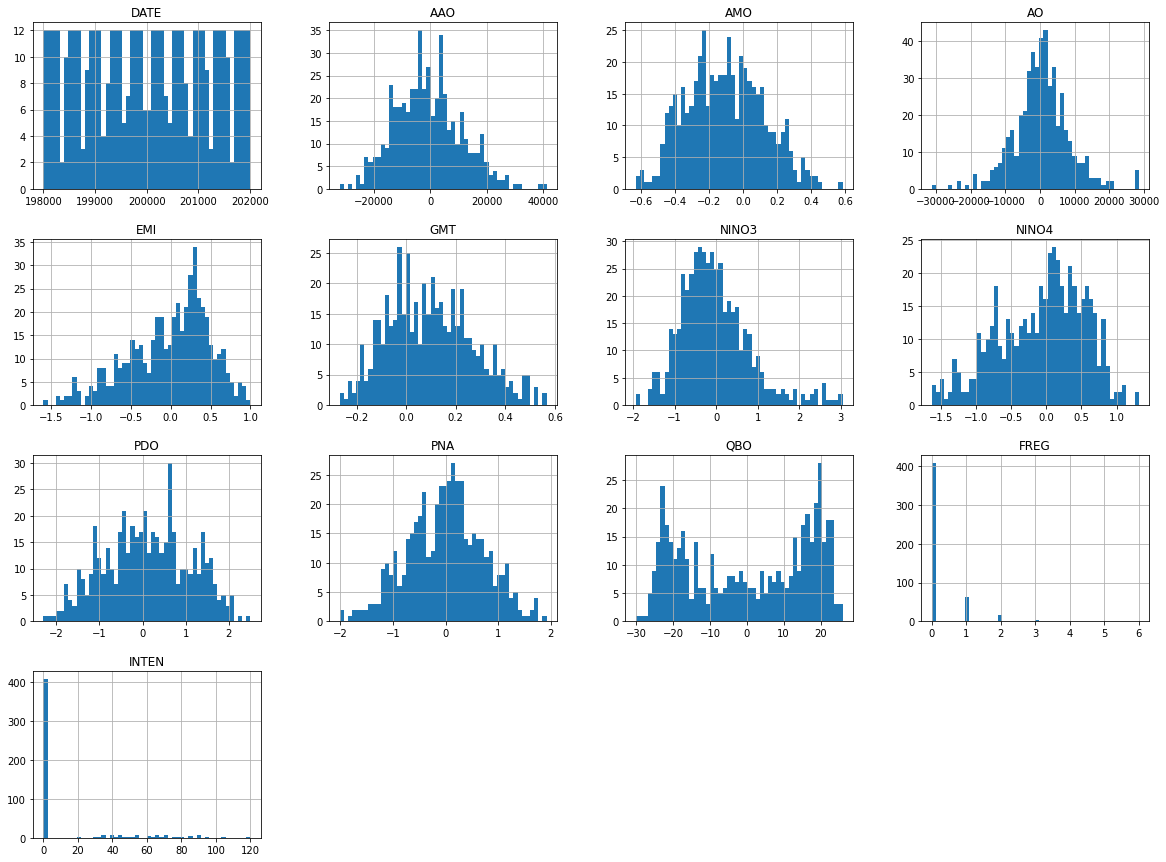

In [6]:
df.hist(bins=50, figsize=(20, 15))

Text(0.5, 1.05, 'Correlation of df Features')

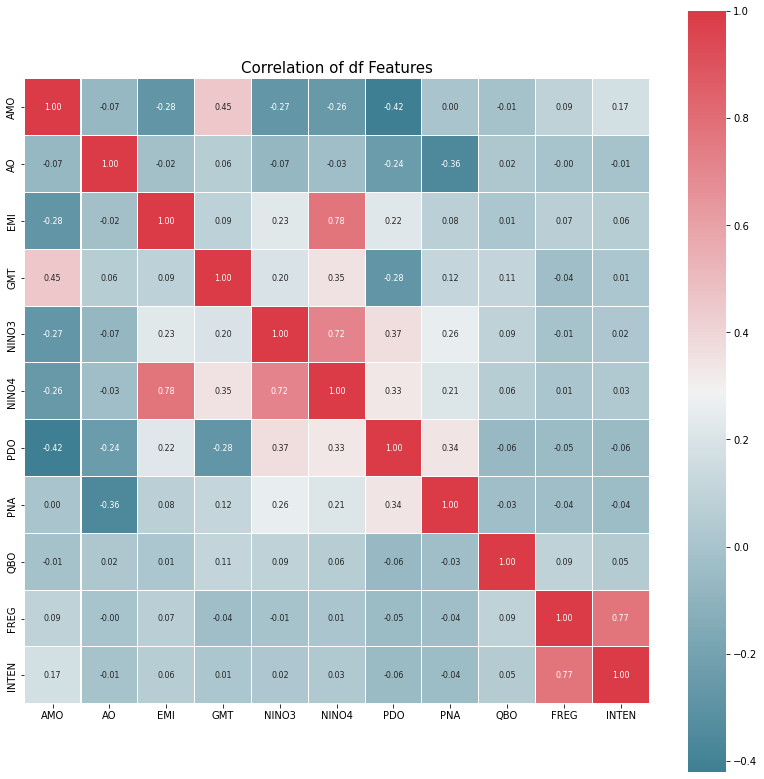

In [45]:
import seaborn as sns
corr = df.iloc[:,2:].corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
            cmap = colormap, linewidths=0.1, linecolor='white')
plt.title('Correlation of df Features', y=1.05, size=15)

Have to remove highly correlated features bigger than 0.95, but nothing here.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6710868290>,
      dtype=object)

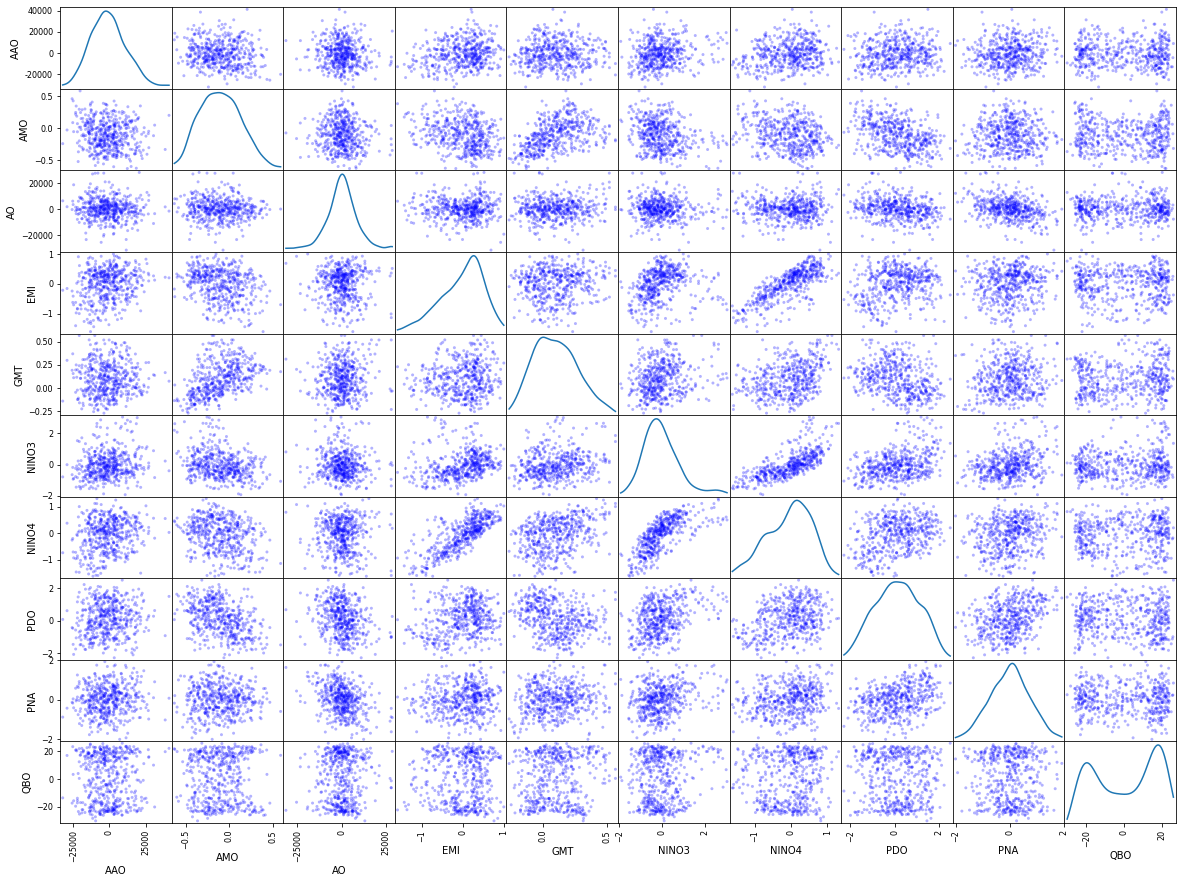

In [7]:
from matplotlib import cm
from pandas.plotting import scatter_matrix
scatter_matrix(X, diagonal='kde', color='b', alpha=0.3, figsize=(20, 15))

In [16]:
## 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기

## 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환
from sklearn import datasets # python 저장 데이터 가져오기

# 4. 훈련/검증용 데이터 분리
from sklearn.model_selection import train_test_split 

## 5.분류모델구축
from sklearn.tree import DecisionTreeClassifier # 결정 트리
from sklearn.neighbors import KNeighborsClassifier # K-최근접 이웃
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 모델
from sklearn.ensemble import AdaBoostClassifier # 분류법
from sklearn.metrics import precision_recall_curve, roc_curve, classification_report
from sklearn.ensemble import RandomForestClassifier

## 5_1.앙상블 모델 구축
from sklearn.ensemble import VotingClassifier # 과반수 투표(Majority Voting) 

## 6.모델검정
from sklearn.metrics import confusion_matrix, classification_report # 정오분류표
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score # 정확도, 민감도 등
from sklearn.metrics import roc_curve, auc # ROC 곡선 그리기

## 7.최적화
from sklearn.model_selection import learning_curve, validation_curve # 학습곡선, 검증곡선
from sklearn.model_selection import GridSearchCV # 하이퍼파라미터 튜닝
from sklearn.model_selection import cross_val_score # 교차타당도 # 추가

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((344, 10), (344,), (148, 10), (148,))

In [37]:
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        45
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         1

    accuracy                           0.90        50
   macro avg       0.30      0.33      0.32        50
weighted avg       0.81      0.90      0.85        50



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision: positive라고 예측한 것 중에 얼마나 잘 맞았는지

recall: 실제 positive인 것을 얼마나 잘 예측했는지

F1-score: 조화평균

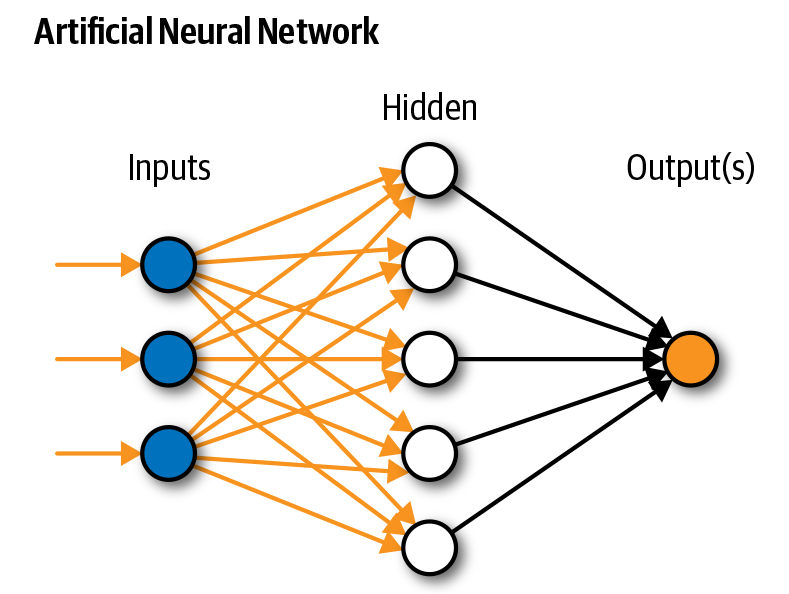

In [47]:
# ANN 모델
import keras
#importing sequential module
from keras.models import Sequential
# import dense module for hidden layers
from keras.layers import Dense
#importing activation functions
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

#CREATING THE ANN AS SEQUENCE OF LAYERS
ann =Sequential()

#ADDING FIRST HIDDEN LAYER WITH 30 NEURONS, THE INPUT LAYER WILL BE ADDED AUTOMATICALLY,
ann.add(Dense(units = 30,activation = 'relu'))
ann.add(BatchNormalization())
ann.add(Dropout(0.5))

#ADDING 2ND HIDDEN LAYER WITH 30 NEURONS
ann.add(Dense(units = 30,activation = 'relu'))
ann.add(BatchNormalization())
ann.add(Dropout(0.5))

#ADDING OUTPUT LAYER WITH 1 NEURON , AS THIS IS A BINARY CLASSIFICATION
ann.add(Dense(units = 1,activation = 'sigmoid'))

In [50]:
#COMPILING THE ANN USING STOCHASTIC GRADIENT DESCENT (optimizer = 'adam')
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#setting callbacks for monitoring maximum accuracy
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

#TRAINING THE ANN WITH BATCH SIZE OF 32 (THIS IS A BATCH LEARNING)
model=ann.fit(X_train, y_train,batch_size = 32, validation_data=(X_test, y_test),epochs =100,callbacks = [early_stop])

Epoch 1/100
11/11 [==============================] - 2s 24ms/step - loss: 0.6101 - accuracy: 0.7529 - val_loss: 0.5448 - val_accuracy: 0.7973
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 0.5695 - accuracy: 0.7122 - val_loss: 0.5477 - val_accuracy: 0.7770
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 0.6016 - accuracy: 0.7238 - val_loss: 0.5523 - val_accuracy: 0.7770
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 0.6083 - accuracy: 0.7238 - val_loss: 0.5600 - val_accuracy: 0.7230
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 0.6079 - accuracy: 0.7355 - val_loss: 0.5599 - val_accuracy: 0.7365
Epoch 6/100
11/11 [==============================] - 0s 7ms/step - loss: 0.5827 - accuracy: 0.7442 - val_loss: 0.5652 - val_accuracy: 0.7297
Epoch 7/100
11/11 [==============================] - 0s 7ms/step - loss: 0.4977 - accuracy: 0.7907 - val_loss: 0.5624 - val_accuracy: 0.7365
Epoch 8/100


In [52]:
#taking summary of layers
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                330       
                                                                 
 batch_normalization (BatchN  (None, 30)               120       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 batch_normalization_1 (Batc  (None, 30)               120       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 30)                0

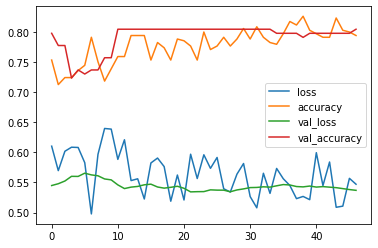

In [53]:
losses = pd.DataFrame(ann.history.history)
losses.plot()

In [56]:
#now testing for Test data
y_pred = ann.predict(X_test)
#converting values
y_pred = (y_pred>0.5)

5/5 [==============================] - 0s 3ms/step


In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test,y_pred)
score = accuracy_score(y_test,y_pred)
print(cm)
print('score is:',score)

[[119   0   0   0]
 [ 22   0   0   0]
 [  6   0   0   0]
 [  1   0   0   0]]
score is: 0.8040540540540541
